## Importing necessary libraries

In [1336]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import pandas as pd
import numpy as np
import itertools
import math
import seaborn as sns
from matplotlib import pyplot as plt

# Import machine learning libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import xgboost
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Import Basemap for geographical visualization
from mpl_toolkits.basemap import Basemap
import imblearn



## Loading Datasets

In [1337]:
# Read the training data from CSV files
training_data = pd.read_csv('training_data.csv')  # Reading training data into DataFrame
training_labels = pd.read_csv('training_labels.csv')  # Reading training labels into DataFrame

In [1338]:
# Print the columns of the training data and labels to verify the data
print(training_data.columns)  # Print columns of training data
print(training_labels.columns)  # Print columns of training labels

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')
Index(['id', 'status_group'], dtype='object')


In [1339]:
# Merge training data and training labels on 'id' column
train_data = pd.merge(training_data, training_labels, on='id')

# Print the columns of the merged DataFrame to verify the merge operation
print(train_data.columns)  # Print columns of the merged DataFrame


Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')


## EDA  (Joint Venture)

#### Descriptive Statistics

In [1340]:
# Generate descriptive statistics of the merged DataFrame
train_data.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [1341]:
# Print a concise summary of the merged DataFrame
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

#### Geographic Distribution of Waterpoints in Tanzania

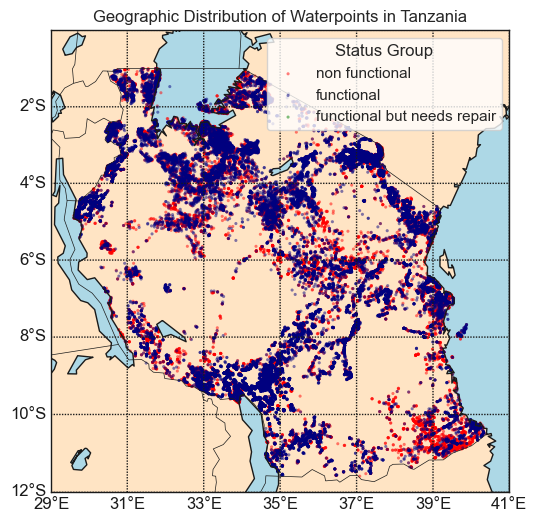

In [1342]:
# Create a figure with a specific size
plt.figure(figsize=(9, 6))

# Initialize a Basemap object with mercator projection and specify the geographical boundaries
map_plot = Basemap(projection='merc', llcrnrlat=-12, urcrnrlat=0, llcrnrlon=29, urcrnrlon=41, lat_ts=20, resolution='l')

# Draw coastlines, countries, fill continents and draw map boundary
map_plot.drawcoastlines()
map_plot.drawcountries()
map_plot.fillcontinents(color='bisque', lake_color='lightblue')
map_plot.drawmapboundary(fill_color='lightblue')

# Define a color map for different water point status groups
color_map = {
    'non functional': 'red',
    'functional': 'navy',
    'functional but needs repair': 'green'
}

# Plot water points for each status group with different colors
for status, color in color_map.items():
    subset = train_data[train_data['status_group'] == status]
    # Convert longitude and latitude to map coordinates
    x_map, y_map = map_plot(subset['longitude'].values, subset['latitude'].values)
    # Scatter plot on the map
    map_plot.scatter(x_map, y_map, color=color, label=status, alpha=0.5, edgecolor='none', s=5)

# Draw parallels and meridians with specific labels
map_plot.drawparallels(range(-12, 1, 2), labels=[1,0,0,0])
map_plot.drawmeridians(range(29, 42, 2), labels=[0,0,0,1])

# Add legend with title and specify location
plt.legend(title='Status Group', loc='upper right')

# Add title to the plot
plt.title('Geographic Distribution of Waterpoints in Tanzania')

# Display the plot
plt.show()


#### Pump status distribution

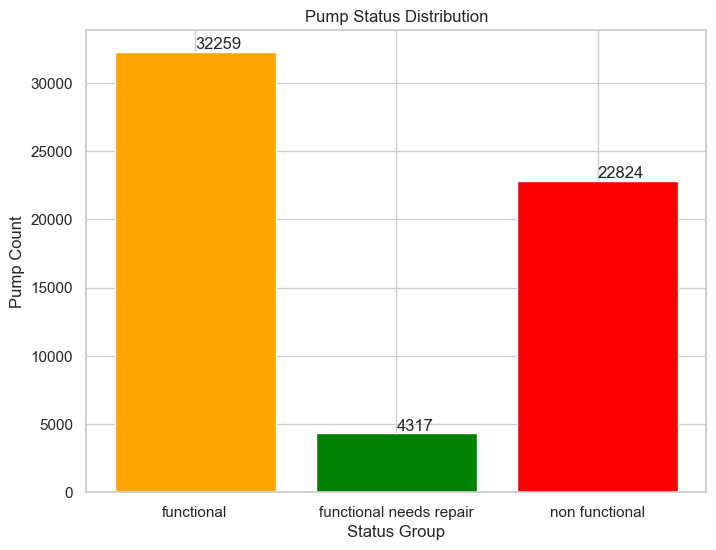

status_group
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: proportion, dtype: float64

In [1343]:
# Grouping the data by 'status_group' and counting the occurrences
status_group = train_data.groupby(['status_group']).size().reset_index().rename(columns={0: 'pump_count'})

# Create a figure for the plot
plt.figure(figsize=(8, 6))

# Create a bar plot with specified colors
bars = plt.bar(status_group['status_group'], status_group['pump_count'], color=['orange', 'green', 'red'])

# Set title and labels for the plot
plt.title('Pump Status Distribution')
plt.xlabel('Status Group')
plt.ylabel('Pump Count')

# Adding labels to the bars showing the exact count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

# Display the plot
plt.show()



# Print normalized value counts of 'status_group'
train_data['status_group'].value_counts(normalize=True)


## Extracting Year

In [1344]:
# Convert the 'date_recorded' column to datetime format and extract the year
train_data['year'] = pd.to_datetime(train_data['date_recorded']).dt.year

# Calculate the age of the water point by subtracting the construction year from the recorded year
train_data['age'] = train_data['year'] - train_data['construction_year']

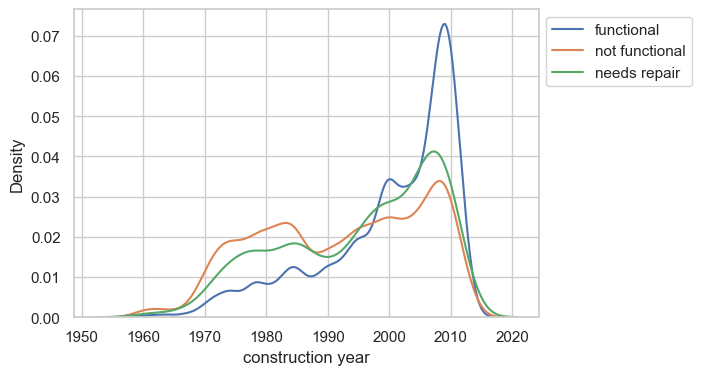

In [1345]:
# Create a figure with a specified size
figure_size = plt.figure(figsize=(6, 4))

# Filter out data points where the construction year is not zero
train_data_construction_not_zero = train_data[train_data.construction_year != 0]

# Plot the distribution of construction years for functional pumps
sns.distplot(train_data_construction_not_zero[train_data_construction_not_zero.status_group == 'functional'].construction_year, hist=False, 
             label='functional')

# Plot the distribution of construction years for non-functional pumps
sns.distplot(train_data_construction_not_zero[train_data_construction_not_zero.status_group == 'non functional'].construction_year, hist=False, 
             label='not functional')

# Plot the distribution of construction years for pumps needing repair
sns.distplot(train_data_construction_not_zero[train_data_construction_not_zero.status_group == 'functional needs repair'].construction_year, hist=False, 
             label='needs repair')

# Add a legend to the plot
plt.legend(bbox_to_anchor=[1, 1])

# Set the label for the x-axis
plt.xlabel('construction year')

# Remove the patch surrounding the figure
figure_size.patch.set_visible(False)

# Display the plot
plt.show()



It appears that a significant portion of the functional wells have been constructed recently.

Since construction year  is mostly missing, we will do binning on it to create categorical variables

## Binning

In [1346]:
# Define conditions for binning construction year into categories
binning_construction_year_condition = [
    train_data.construction_year > 2005,  # Water points built after 2005
    train_data.construction_year > 2000,  # Water points built between 2000 and 2005
    train_data.construction_year > 1990,  # Water points built between 1990 and 2000
    train_data.construction_year > 1980,  # Water points built between 1980 and 1990
    train_data.construction_year > 1970   # Water points built between 1970 and 1980
]

# Define values for each binning condition
binning_construction_year_values = ['2005>', '2000-2005', '1990-2000', '1980-1990', '1970-1990']

# Create a new column 'built_year' based on the binning conditions
train_data['built_year'] = np.select(binning_construction_year_condition, binning_construction_year_values, 'others')


## More EDA (Joint Venture)

#### Distribution of water points by construction year and status group

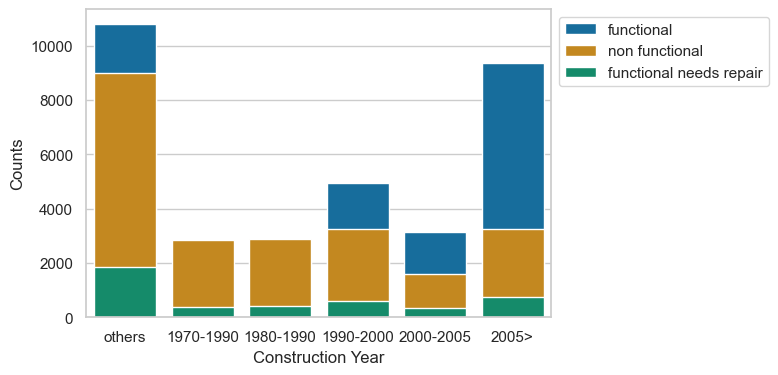

In [1347]:
# Create a figure with specified size
figure_size = plt.figure(figsize=(6, 4))

# Create a count plot to visualize the distribution of water points by construction year and status group
sns.countplot(
    hue='status_group',  # Color by status group
    x='built_year',  # x-axis: construction year categories
    dodge=False,  # Disable dodging to stack bars
    data=train_data,  # Use train_data DataFrame
    order=['others', '1970-1990', '1980-1990', '1990-2000', '2000-2005', '2005>'],  # Specify order of x-axis categories
    palette='colorblind'  # Color palette for different status groups
)

# Set custom x-axis labels
plt.xticks(range(0, 6), ['others', '1970-1990', '1980-1990', '1990-2000', '2000-2005', '2005>'])

# Set labels for x-axis and y-axis
plt.xlabel('Construction Year')
plt.ylabel('Counts')

# Add legend outside the plot area
plt.legend(bbox_to_anchor=[1, 1])

# Make the background patch visible
figure_size.patch.set_visible(True)

# Display the plot
plt.show()


It seems like older water pumps are less important as most of the water pumps are either non functional or functional needs repair

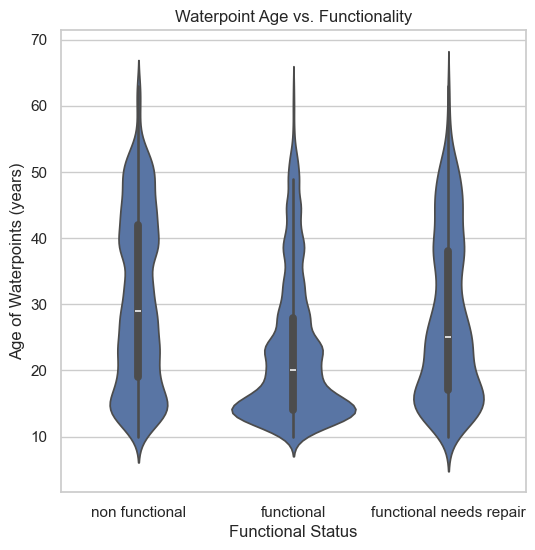

In [1348]:
data = train_data

# Filter out records where the construction year is zero (missing data)
data = data[data['construction_year'] > 0]

# Calculate age of the waterpoints
current_year = 2023  
data['age'] = current_year - data['construction_year']

plt.figure(figsize=(6, 6))
sns.violinplot(x='status_group', y='age', data=data)
plt.title('Waterpoint Age vs. Functionality')
plt.xlabel('Functional Status')
plt.ylabel('Age of Waterpoints (years)')
plt.show()

In [1349]:
train_data['zero_private']=np.where(train_data.num_private==0,1,0)

#### Population vs Status Group

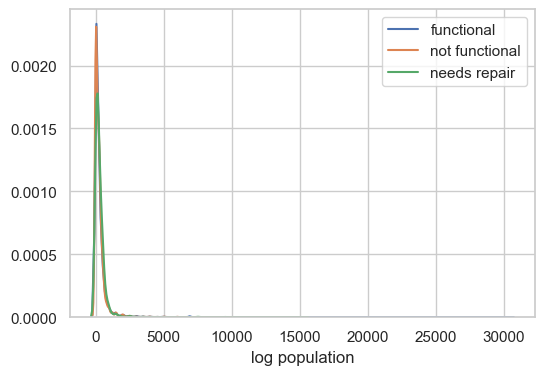

In [1350]:
# Create a figure with a specified size
figure_size = plt.figure(figsize=(6, 4))

# Filter out data points where the population is not zero
population_not_equal_zero = train_data[train_data.population != 0]

# Plot the distribution of population for functional pumps
sns.distplot(population_not_equal_zero[population_not_equal_zero.status_group == 'functional'].population, hist=False, 
             label='functional')

# Plot the distribution of population for non-functional pumps
sns.distplot(population_not_equal_zero[population_not_equal_zero.status_group == 'non functional'].population, hist=False, 
             label='not functional')

# Plot the distribution of population for pumps needing repair
sns.distplot(population_not_equal_zero[population_not_equal_zero.status_group == 'functional needs repair'].population, hist=False, 
             label='needs repair')

# Set the label for the x-axis
plt.xlabel('log population')

# Remove the label for the y-axis
plt.ylabel('')

# Add a legend to the plot
plt.legend(bbox_to_anchor=[1, 1])


# Display the plot
plt.show() 


#### Correlation between Region and Region Code

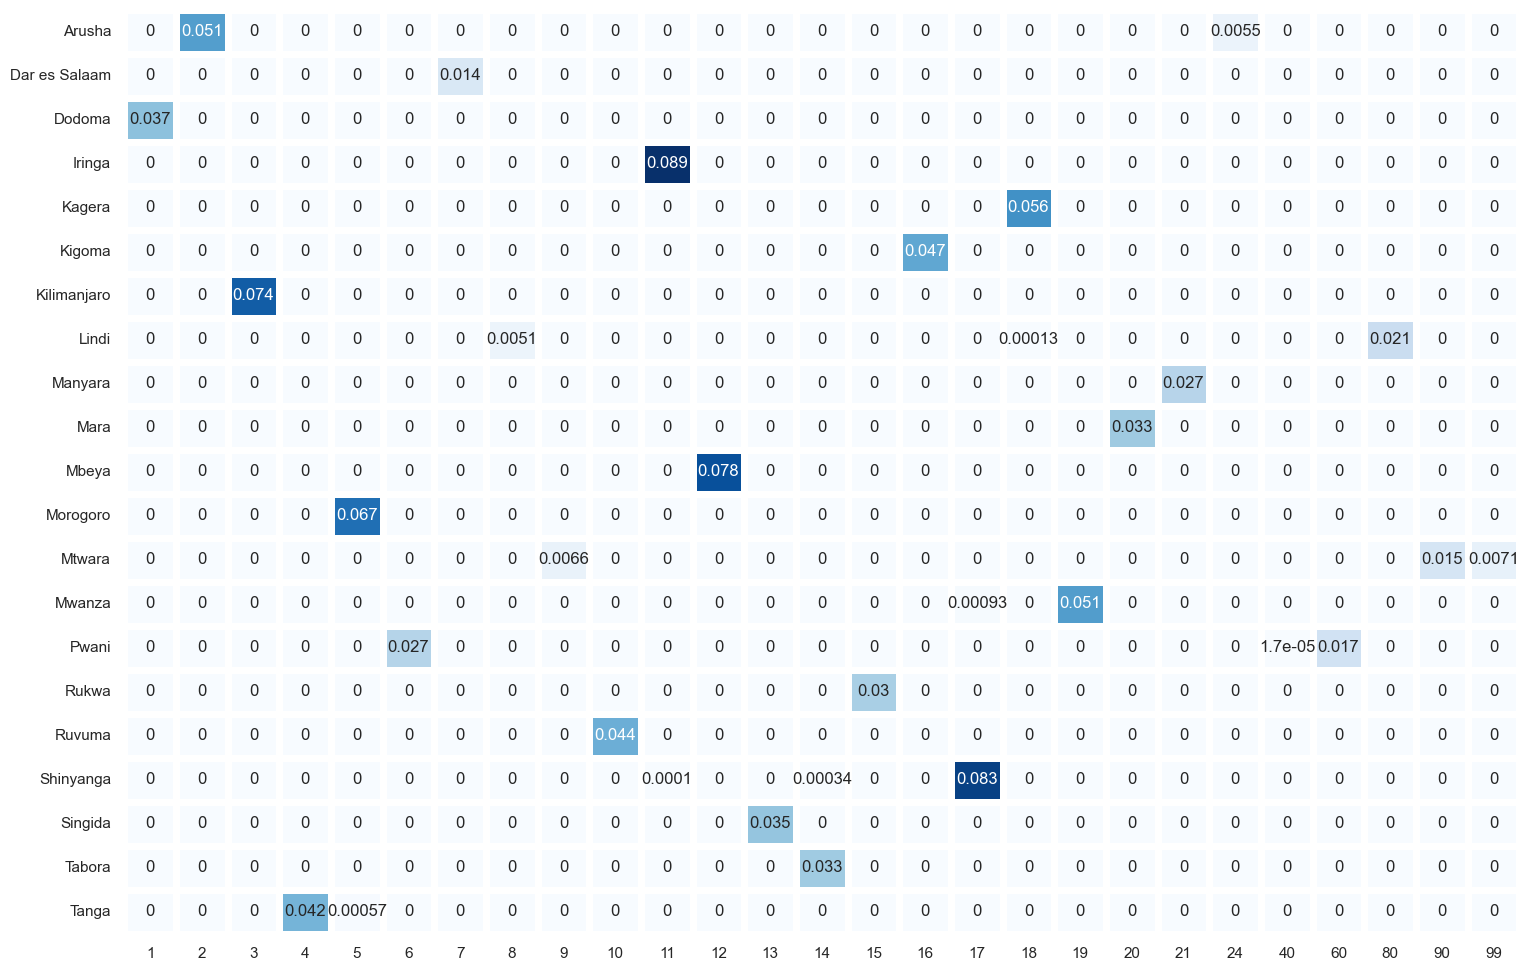

In [1351]:
# Create a figure with a specified size
figure_size = plt.figure(figsize=(18, 12))

# Convert 'region_code' to object type to preserve its categorical nature
train_data['region_code'] = train_data['region_code'].astype(object)
train_data['district_code'] = train_data['district_code'].astype(object)

# Create a cross-tabulation of 'region' and 'region_code', and normalize it
ct = pd.crosstab(train_data['region'], train_data['region_code'], normalize=True)

# Create a heatmap of the cross-tabulation
sns.heatmap(ct, linewidth=5, cbar=False, cmap='Blues', annot=True)

plt.xlabel('region_code')

plt.ylabel('region')

# Display the plot
plt.show()


It seems like region and region_code are same things, except region code has a few more values. I will drop region_code.

In [1352]:
train_data['id'].duplicated(keep=False).sum()

0

#### Correlation and frequency distribution amongst Extraction features

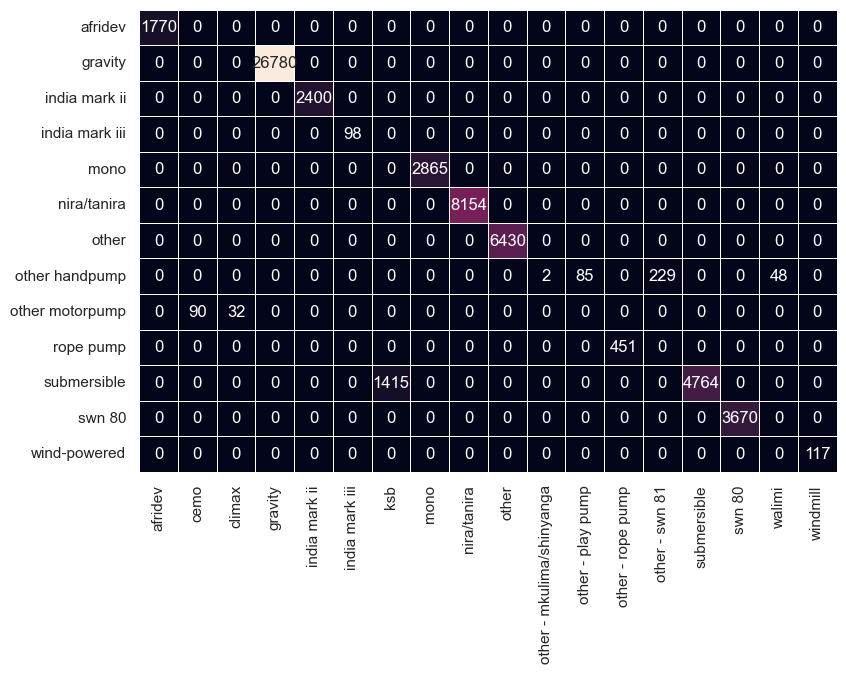

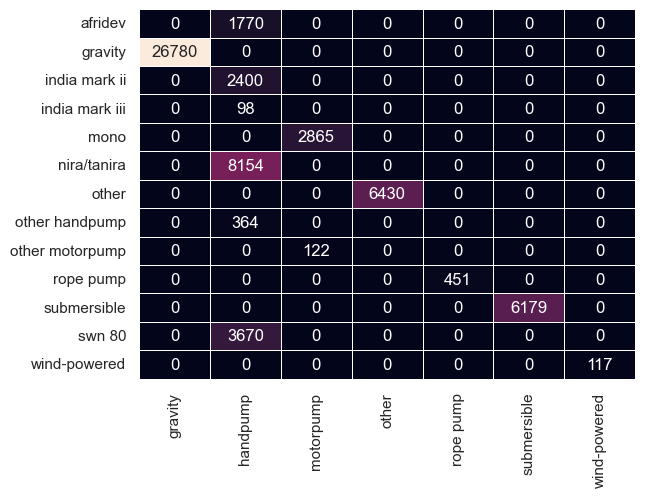

In [1353]:
# Cross-tabulate 'extraction_type_group' against 'extraction_type'
extraction_type_ct = pd.crosstab(train_data['extraction_type_group'], train_data['extraction_type'])
plt.figure(figsize=(9, 6))
# Create a heatmap for the cross-tabulation with annotations, formatting, and customization
sns.heatmap(extraction_type_ct, annot=True, fmt='.0f', linewidths=.5, cbar=False)
plt.xlabel('extraction_type')  # Remove x-axis label
plt.ylabel('extraction_type_group')  # Remove y-axis label
plt.show()  # Display the heatmap

# Cross-tabulate 'extraction_type_group' against 'extraction_type_class'
extraction_type_class_ct = pd.crosstab(train_data['extraction_type_group'], train_data['extraction_type_class'])

# Create a heatmap for the cross-tabulation with annotations, formatting, and customization
sns.heatmap(extraction_type_class_ct, annot=True, fmt='.0f', linewidths=.5, cbar=False)
plt.xlabel('extraction_type_class')  # Remove x-axis label
plt.ylabel('extraction_type_group')  # Remove y-axis label
plt.show()  # Display the heatmap


It seems like extraction_type_group and extraction_type are same things. we can one of the column. From looking at the frequency distribution of extraction_type_group and extraction_type_class, it would be worth it to consider extraction_type_class for model training. 

#### Heatmap of Payment Methods by Type

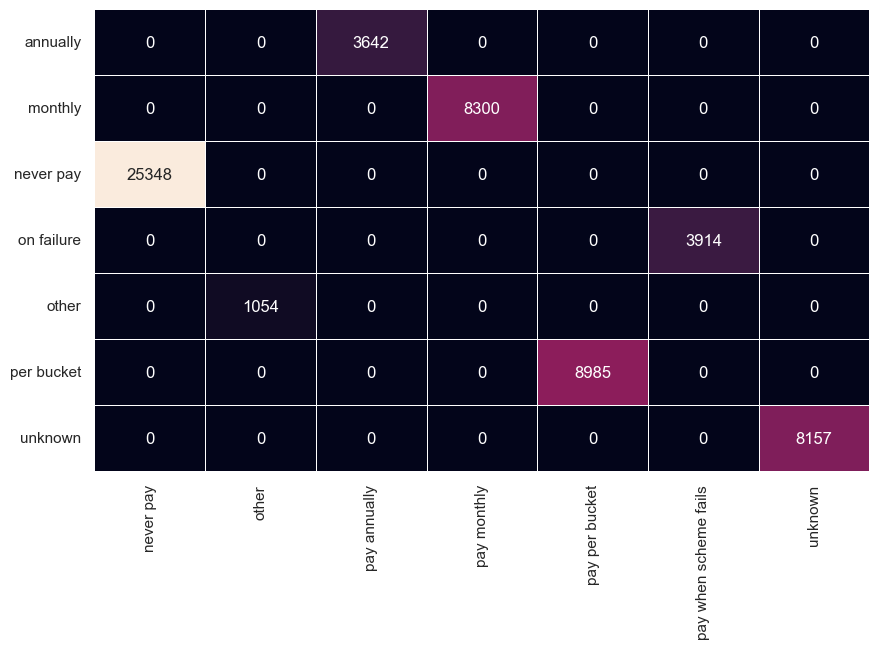

In [1354]:
# Create a cross-tabulation of 'payment_type' against 'payment' from train_data
payment_ct = pd.crosstab(train_data['payment_type'], train_data['payment'])

# Create a heatmap for the cross-tabulation with annotations, formatting, and customization
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.heatmap(payment_ct, annot=True, fmt='.0f', linewidths=.5, cbar=False)
plt.xlabel('payment_type')  # Remove x-axis label
plt.ylabel('payment')  # Remove y-axis label
plt.show()  # Display the heatmap


It seems like payment and payment_type are same things. Drop one of the column payment

#### Management Group Distribution Across Management Categories

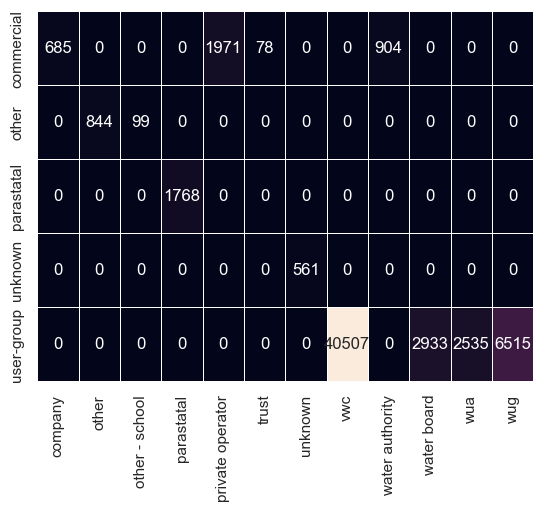

In [1355]:
ct = pd.crosstab(train_data['management_group'], train_data['management'])
sns.heatmap(ct, annot=True, fmt = '.0f', linewidths=.5, cbar = False)
plt.xlabel('management')
plt.ylabel('management_group')
plt.show()

#### Status Group vs Management Groups

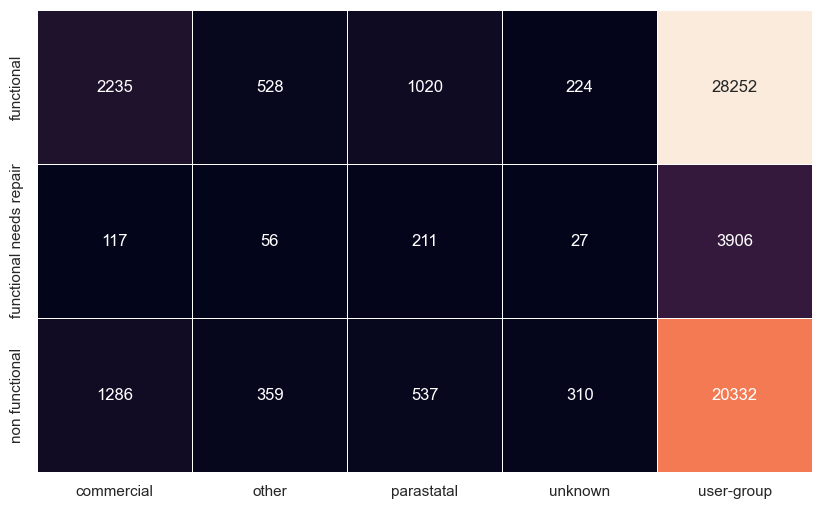

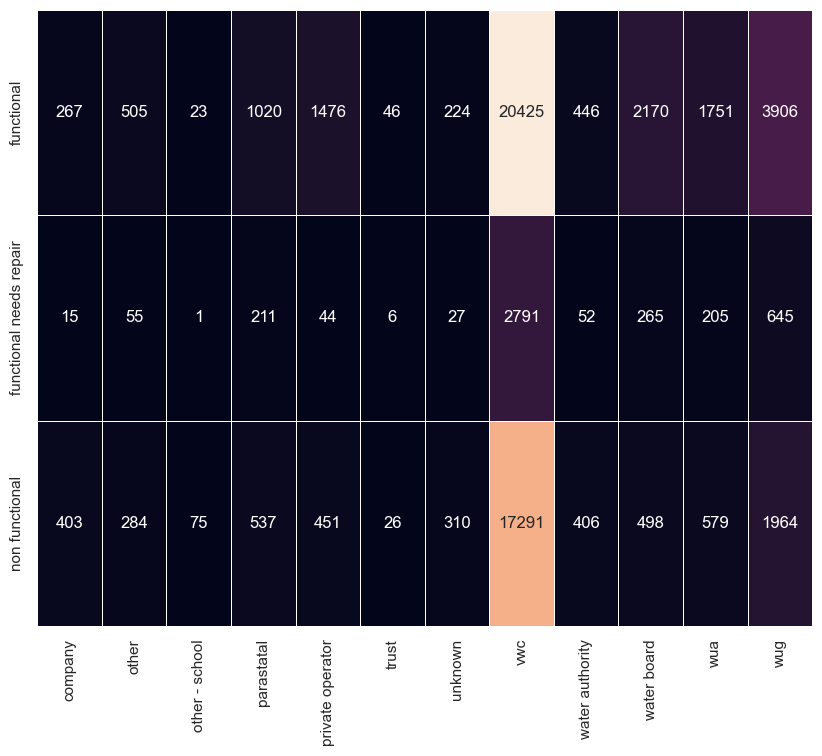

In [1356]:
# Cross-tabulate 'status_group' against 'management_group' from train_data
status_vs_management_group_ct = pd.crosstab(train_data['status_group'], train_data['management_group'])

# Create a heatmap for the cross-tabulation with annotations, formatting, and customization
plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.heatmap(status_vs_management_group_ct, annot=True, fmt='.0f', linewidths=.5, cbar=False)
plt.xlabel('management_group')  # Remove x-axis label
plt.ylabel('status_group')  # Remove y-axis label
plt.show()  # Display the heatmap

# Cross-tabulate 'status_group' against 'management' from train_data
status_vs_management_ct = pd.crosstab(train_data['status_group'], train_data['management'])

# Create a heatmap for the cross-tabulation with annotations, formatting, and customization
plt.figure(figsize=(10, 8))  # Set the size of the figure
sns.heatmap(status_vs_management_ct, annot=True, fmt='.0f', linewidths=.5, cbar=False)
plt.xlabel('management')  # Remove x-axis label
plt.ylabel('status_group')  # Remove y-axis label
plt.show()  # Display the heatmap

It seems like management group is  a sub-category of management group. I will drop management_group category 

#### Distribution of Status Groups by Management Type

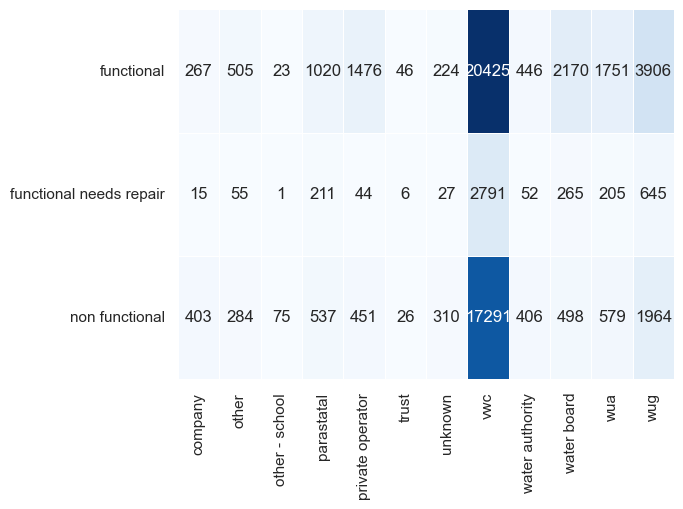

In [1357]:

# Create a cross-tabulation (contingency table) of 'status_group' and 'management' columns from train_data
cross_tab = pd.crosstab(train_data['status_group'], train_data['management'])

# Plot the cross-tabulation using a heatmap
sns.heatmap(cross_tab, annot=True, fmt='.0f', linewidths=.5, cbar=False, cmap="Blues")

plt.xlabel('management')

plt.ylabel('status_group')

# Display the heatmap
plt.show()

#### Water Pump Management Status Analysis

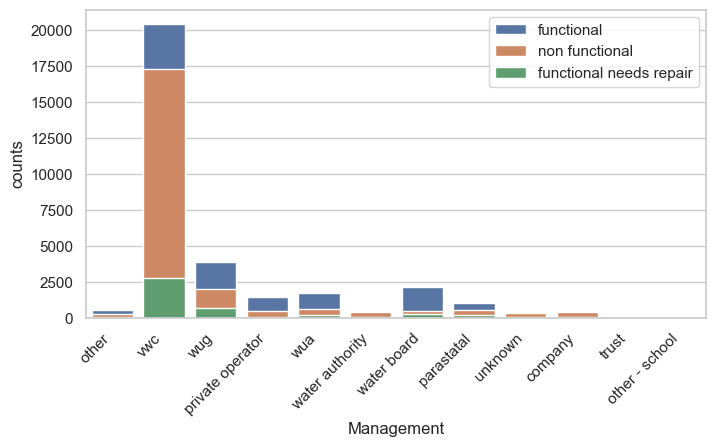

In [1358]:
figure_size = plt.figure(figsize = (8, 4))

sns.countplot(hue = 'status_group', x = 'management', dodge = False,
            data = train_data, hue_order=['functional', 'non functional', 'functional needs repair'])

plt.xlabel('Management')
plt.ylabel('counts')
plt.legend(bbox_to_anchor = [1, 1])
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### Quantity vs. Quantity Group 

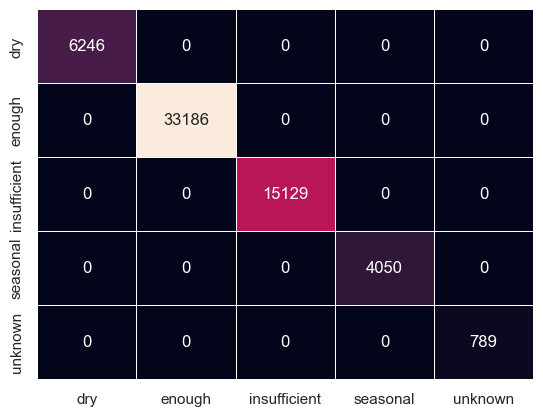

In [1359]:
# Create a cross-tabulation of 'quantity' and 'quantity_group' to analyze the relationship between these variables
quantity_cross_tab = pd.crosstab(train_data['quantity'], train_data['quantity_group'])

# Create a heatmap of the cross-tabulation to visualize the distribution and relationship between 'quantity' and 'quantity_group'
sns.heatmap(quantity_cross_tab, annot=True, fmt='.0f', linewidths=0.5, cbar=False)

plt.xlabel('quantity')

plt.ylabel('quantity_group')

# Display the heatmap
plt.show()


It seems like quantity and quantity_group are same things. Drop one of the column quantity

#### Relationship between Waterpoint Type and Waterpoint Type Group

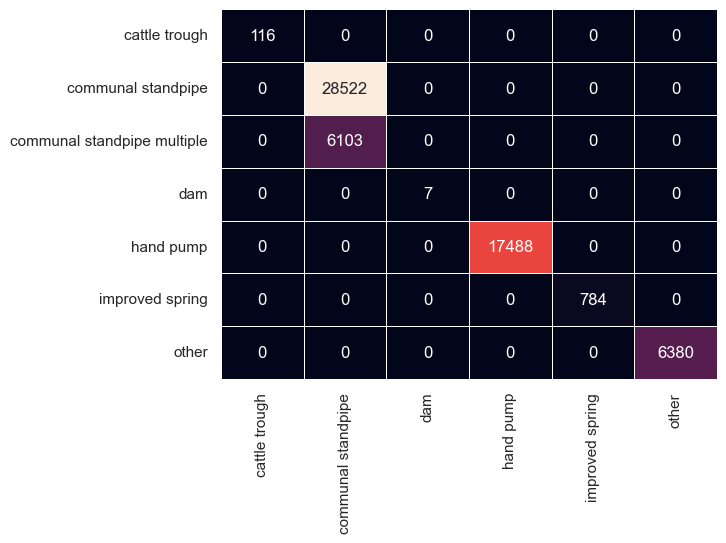

In [1360]:
# Create a cross-tabulation of 'waterpoint_type' and 'waterpoint_type_group' to analyze the relationship between these variables
waterpoint_cross_tab = pd.crosstab(train_data['waterpoint_type'], train_data['waterpoint_type_group'])

# Create a heatmap of the cross-tabulation to visualize the distribution and relationship between 'waterpoint_type' and 'waterpoint_type_group'
sns.heatmap(waterpoint_cross_tab, annot=True, fmt='.0f', linewidths=0.5, cbar=False)

plt.xlabel('waterpoint_type_group')

plt.ylabel('waterpoint_type_group')

# Display the heatmap
plt.show()


The general trend appears to be consistent, with the exception of waterpoint types, where the community standpipe group is divided into two. 

#### Relationship between Source Type and Source Characteristics

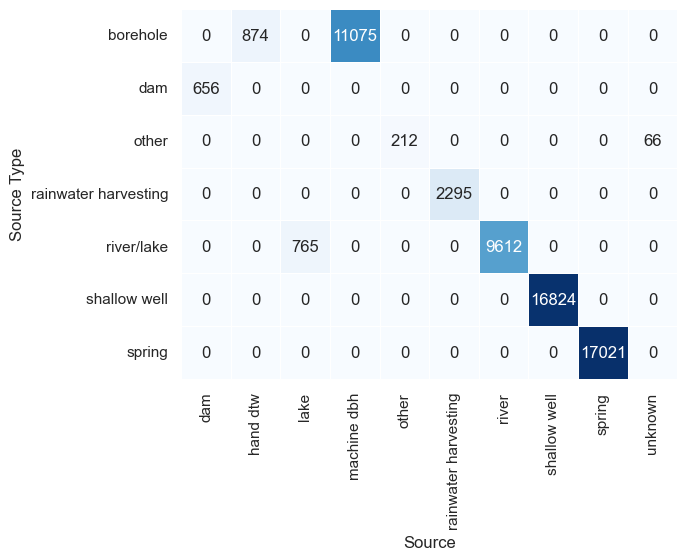

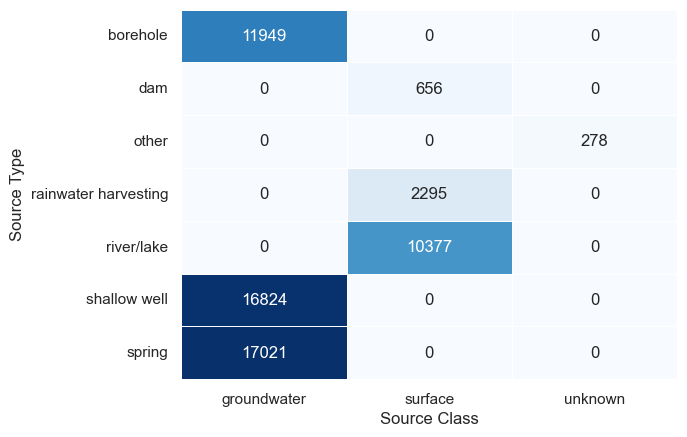

In [1361]:
# Crosstabulation of 'source_type' against 'source'
source_type_vs_source_ct = pd.crosstab(train_data['source_type'], train_data['source'])
sns.heatmap(source_type_vs_source_ct, annot=True, fmt='.0f', linewidths=.5, cbar=False, cmap="Blues")
plt.xlabel('Source')
plt.ylabel('Source Type')
plt.show()

# Crosstabulation of 'source_type' against 'source_class'
source_type_vs_source_class_ct = pd.crosstab(train_data['source_type'], train_data['source_class'])
sns.heatmap(source_type_vs_source_class_ct, annot=True, fmt='.0f', linewidths=.5, cbar=False, cmap="Blues")
plt.xlabel('Source Class')
plt.ylabel('Source Type')
plt.show()


It seems like Source and SourceType are the same column. We can drop one of the column. Let's see the distribution of the source

#### Heatmap of status_group and source

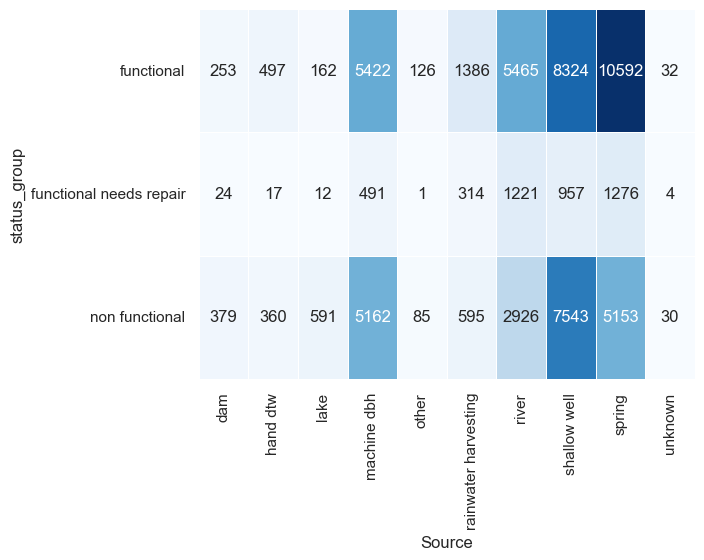

In [1362]:

# Create a cross-tabulation (contingency table) of 'status_group' and 'source' columns from train_data
status_source_cross_tab = pd.crosstab(train_data['status_group'], train_data['source'])

# Plot the cross-tabulation using a heatmap
sns.heatmap(status_source_cross_tab, annot=True, fmt='.0f', linewidths=.5, cbar=False, cmap="Blues")

# Set x-axis label as 'Source'
plt.xlabel('Source')

# Set y-axis label as 'status_group'
plt.ylabel('status_group')

# Display the heatmap
plt.show()

#### Heatmap of status_group and source_class

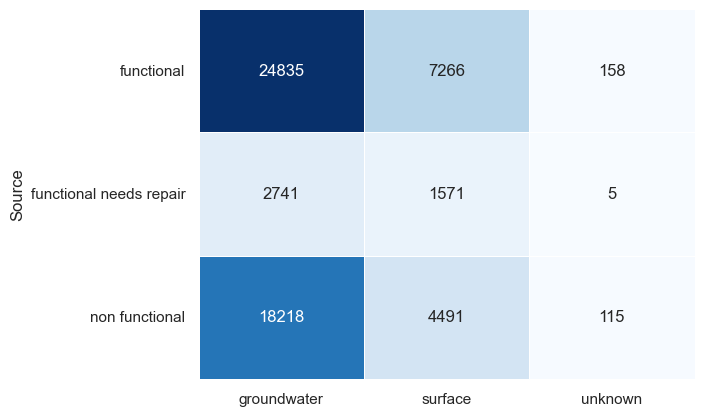

In [1363]:
# Create a cross-tabulation (contingency table) of 'status_group' and 'source_class' columns from train_data
cross_tab = pd.crosstab(train_data['status_group'], train_data['source_class'])

# Plot the cross-tabulation using a heatmap
sns.heatmap(cross_tab, annot=True, fmt='.0f', linewidths=.5, cbar=False, cmap="Blues")


plt.xlabel('source_class')


plt.ylabel('status_group')

# Display the heatmap
plt.show()

## Data Preprocessing (Joint Venture)

#### Drop Columns

In [1364]:
# Remove columns related to water extraction, payment, source type, source class, management group, location, and other redundant or irrelevant features
#reducdant columns are also droped such as wpt_name, subvillage as they have large number of unique values
train_data.drop(
    ['extraction_type_group', 'extraction_type', 'payment', 'source_type', 'source_class',
     'management_group', 'latitude', 'longitude', 'num_private', 'region_code','construction_year',
     'waterpoint_type', 'quantity_group', 'scheme_management', 'wpt_name', 'scheme_name'],
    axis=1,
    inplace=True
)

# Remove additional columns related to location, identification, and date information
train_data.drop(
    ['subvillage', 'ward', 'lga', 'id', 'date_recorded', 'recorded_by', 'year'],
    axis=1,
    inplace=True
)


In [1365]:
#Print train data column names
print(train_data.columns)


Index(['amount_tsh', 'funder', 'gps_height', 'installer', 'basin', 'region',
       'district_code', 'population', 'public_meeting', 'permit',
       'extraction_type_class', 'management', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'source', 'waterpoint_type_group',
       'status_group', 'age', 'built_year', 'zero_private'],
      dtype='object')


#### Dealing with high cardinality

In [1366]:
# Identify categorical columns by checking their data type
categorical_col = [columns for columns in train_data.columns if train_data[columns].dtype == 'O']

# Identify categorical columns with high cardinality (more than 500 unique values)
high_card_columns = [columns for columns in categorical_col if len(train_data[columns].value_counts().index) > 500]
high_card_columns


['funder', 'installer']

In [1367]:

for high_cardinality_cols in high_card_columns:
    # Replace values in each high cardinality column where the count is less than 500 with 'other'
    train_data[[high_cardinality_cols]] = train_data[[high_cardinality_cols]].where(
        train_data[[high_cardinality_cols]].apply(lambda x: x.map(x.value_counts())) >= 500, 'other'
    )


In [1368]:
# Display the counts of unique values in the 'funder' column
train_data['funder'].value_counts()

funder
other                     30574
Government Of Tanzania     9084
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
0                           777
Norad                       765
Germany Republi             610
Tcrs                        602
Ministry Of Water           590
Water                       583
Name: count, dtype: int64

In [1369]:
# Display the counts of unique values in the 'installer' column
train_data['installer'].value_counts()

installer
other                 30208
DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
CES                     610
Community               553
DANID                   552
District Council        551
HESAWA                  539
Name: count, dtype: int64

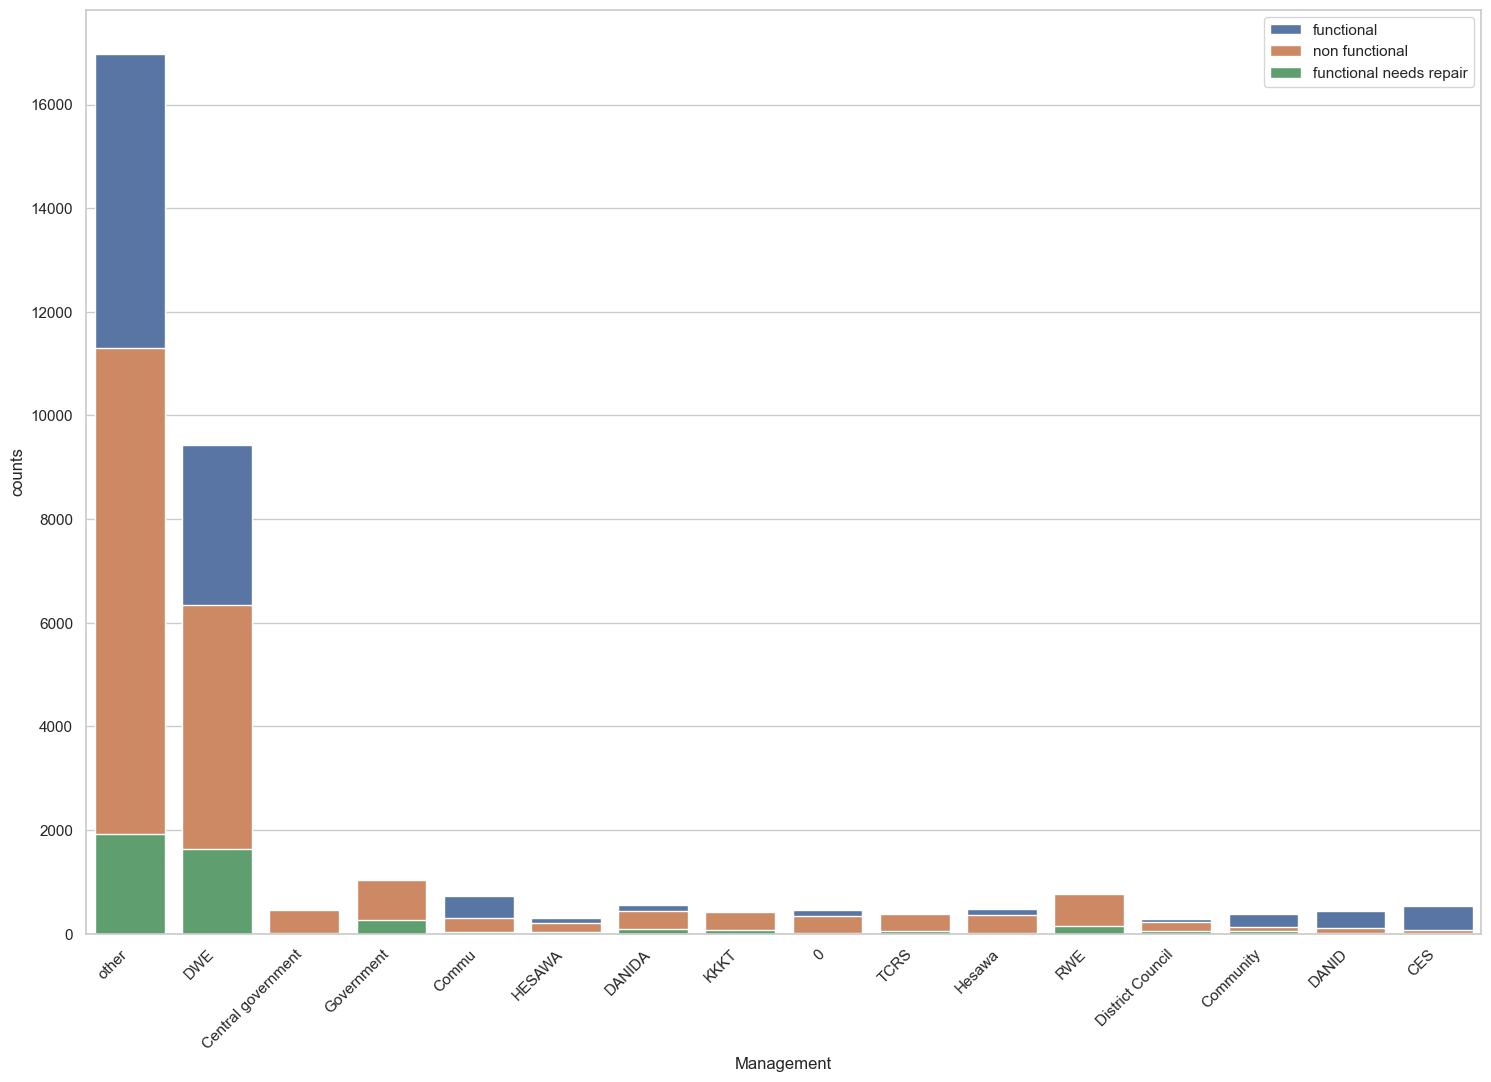

In [1370]:
# Create a figure with a specific size
figure_size = plt.figure(figsize=(18, 12))


sns.countplot(hue='status_group', x='installer', dodge=False,
              data=train_data, hue_order=['functional', 'non functional', 'functional needs repair'])

# Set the x-axis label
plt.xlabel('Management')

# Set the y-axis label
plt.ylabel('counts')

# Place the legend outside the plot
plt.legend(bbox_to_anchor=[1, 1])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


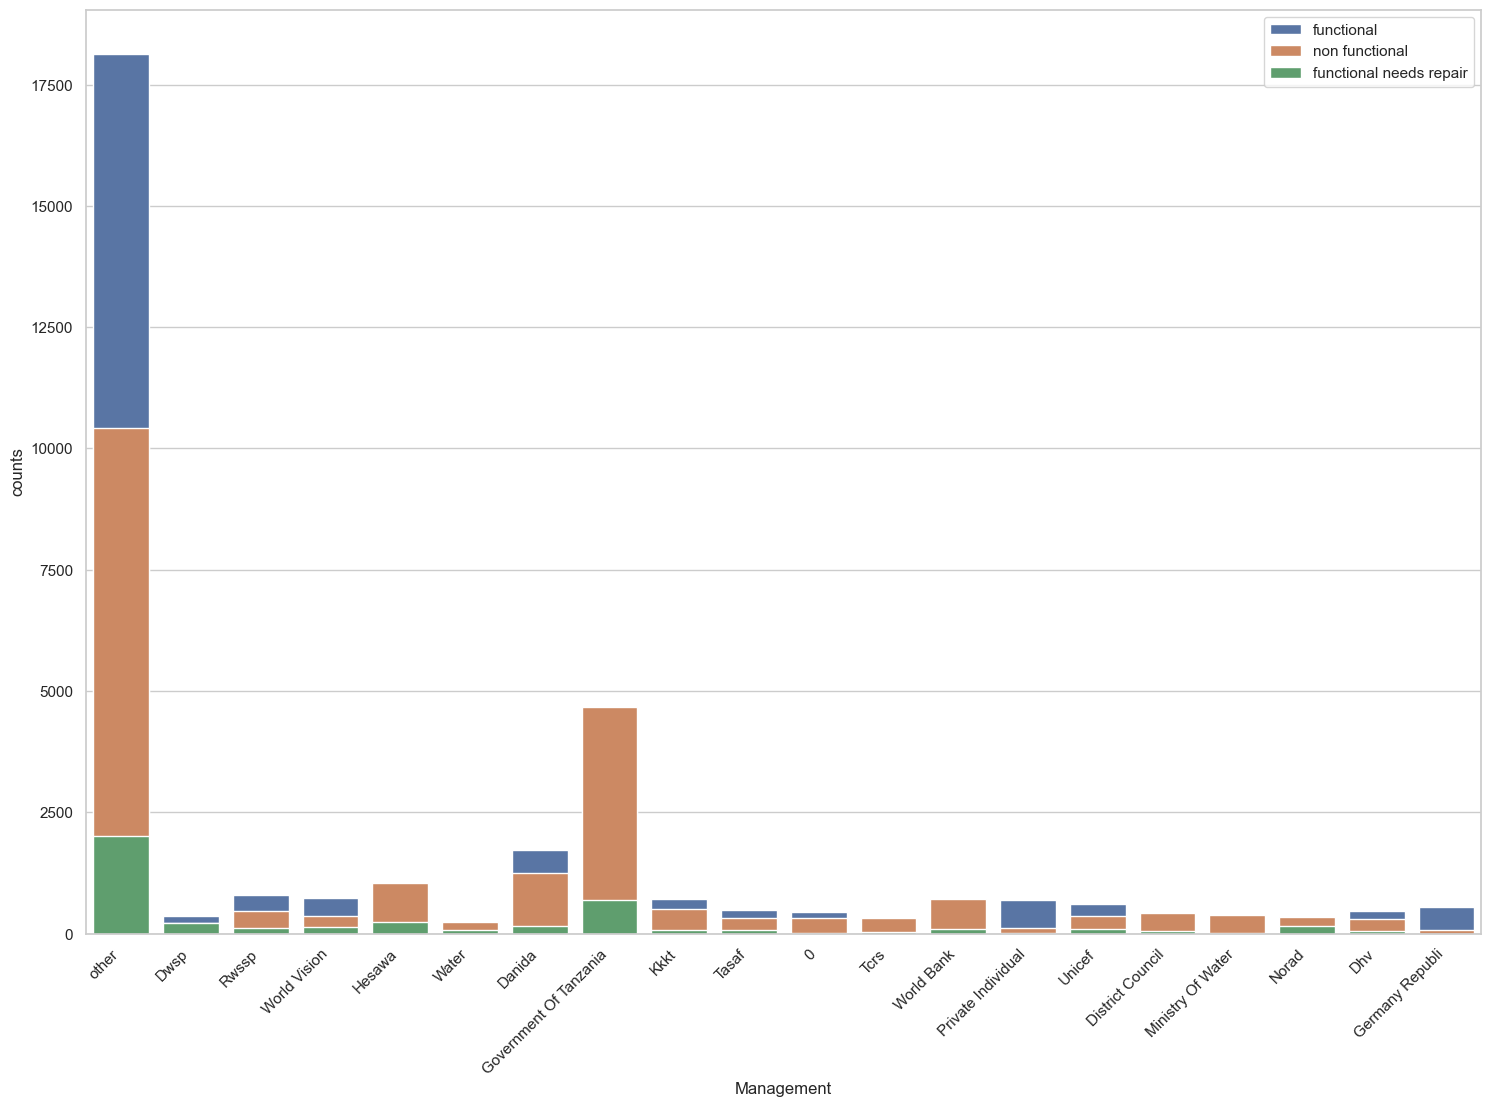

In [1371]:
figure_size = plt.figure(figsize = (18, 12))

sns.countplot(hue = 'status_group', x = 'funder', dodge = False,
            data = train_data, hue_order=['functional', 'non functional', 'functional needs repair'])

plt.xlabel('Management')
plt.ylabel('counts')
plt.legend(bbox_to_anchor = [1, 1])
plt.xticks(rotation = 45, ha = 'right')
plt.show()

#### Numerical data imputation

In [1372]:
numeric_col = [col for col in train_data.columns if train_data[col].dtype != 'O']
# check for missing value
for column in numeric_col:
    train_data[column]=train_data[column].fillna(train_data[column].mode()[0])

In [1373]:
# sns.pairplot(train_data, vars=numeric_col,hue ='status_group')
# plt.show()


In [1374]:
train_data.columns
numeric_col = [col for col in train_data.columns if train_data[col].dtype != 'O']
numeric_col

['amount_tsh', 'gps_height', 'population', 'age', 'zero_private']

Text(0.5, 1.0, 'Correlation HeatMap')

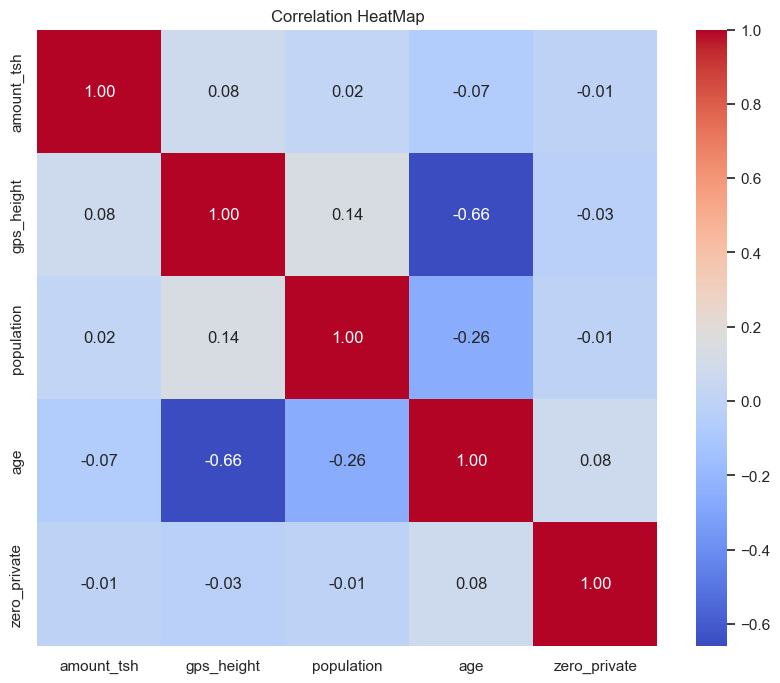

In [1375]:
corr_matrix = train_data[numeric_col].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation HeatMap')


In [1376]:

# sns.pairplot(train_data[numeric_col],size=2.5)



#### Categorical data imputation

In [1377]:
categorical_col.remove('status_group')
# check for missing value and fill the missing value
for column in categorical_col:
    train_data[column]=train_data[column].fillna(train_data[column].mode()[0])
categorical_col

['funder',
 'installer',
 'basin',
 'region',
 'district_code',
 'public_meeting',
 'permit',
 'extraction_type_class',
 'management',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'source',
 'waterpoint_type_group',
 'built_year']

#### Encoding

In [1378]:
binary_enc = OrdinalEncoder()

# Fit the encoder on training data with both feature names
binary_enc.fit(train_data[['permit', 'public_meeting']])

# Transform permit and public_meeting columns in both train and test data
train_permit_public_meeting_encoded = binary_enc.transform(train_data[['permit', 'public_meeting']])


# Assign the encoded values back to train and test data
train_data[['permit', 'public_meeting']] = train_permit_public_meeting_encoded
train_data['permit'].unique()


array([1., 0.])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


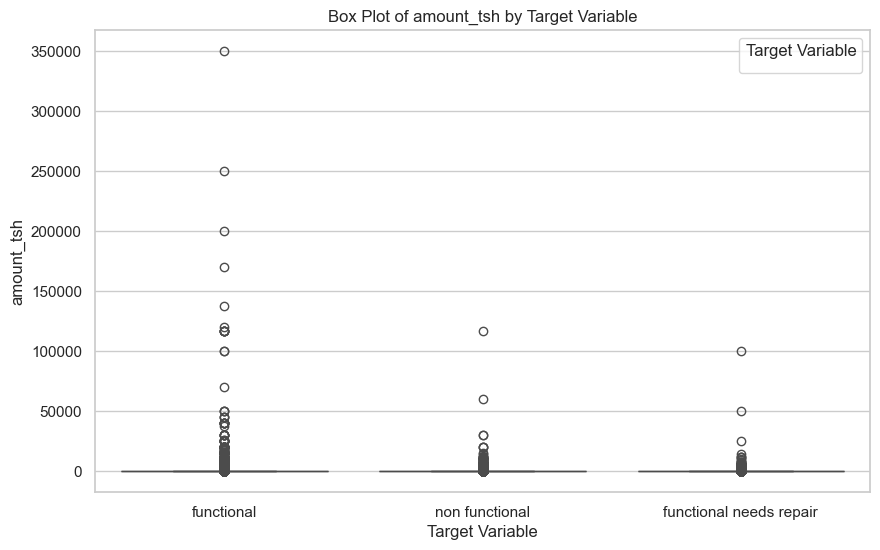

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


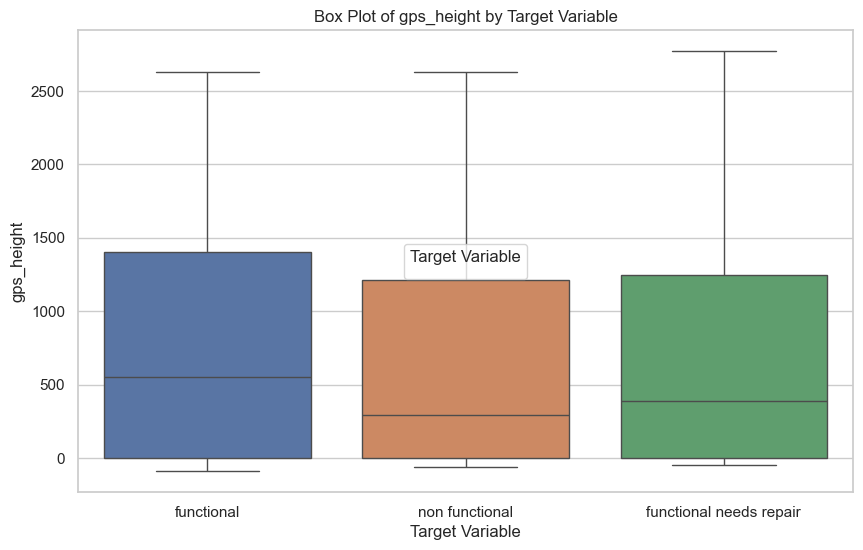

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


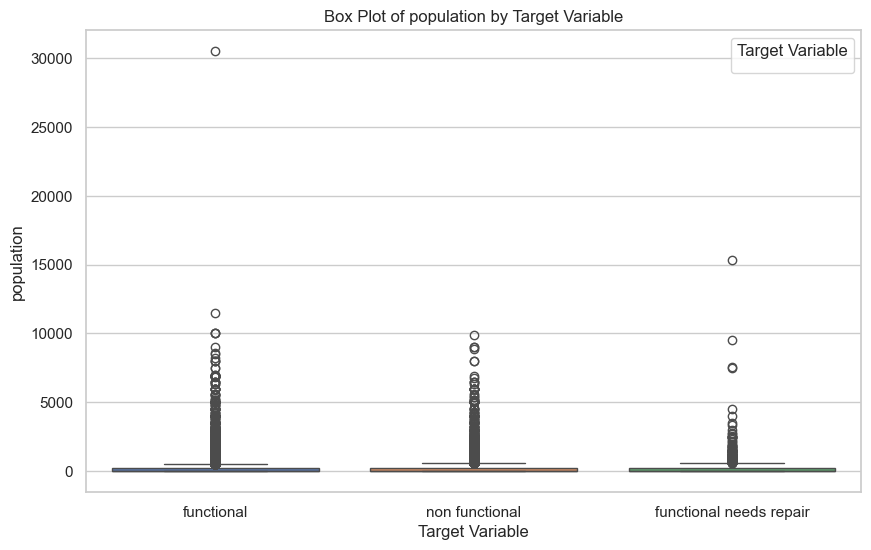

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


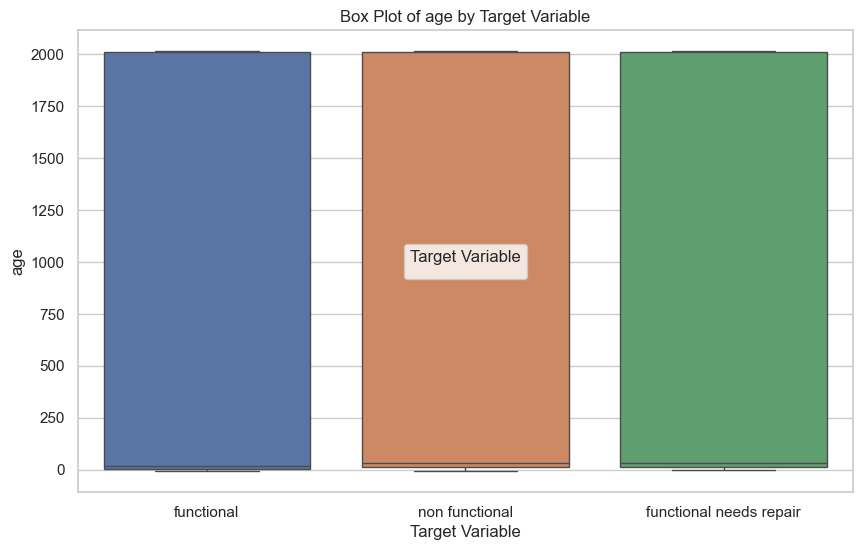

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


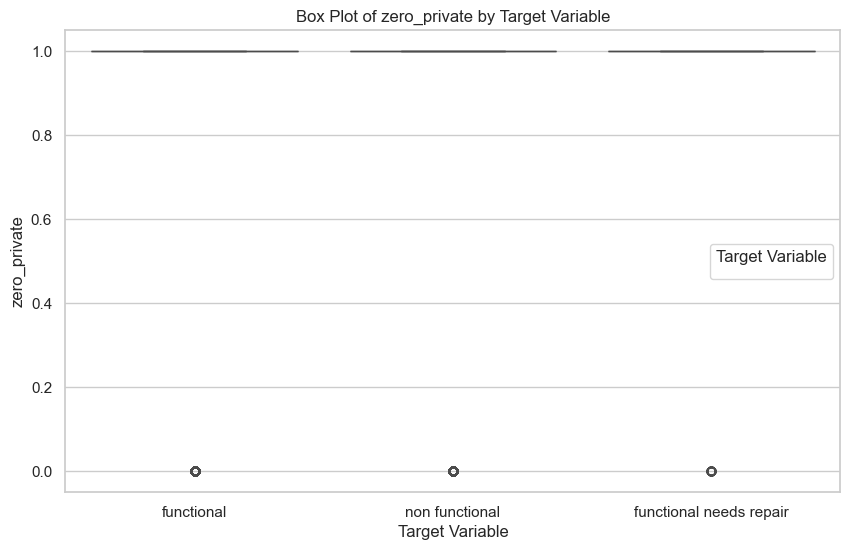

In [1379]:

# Assuming numeric_col is a list of numeric column names in your dataset
for feature in numeric_col:
    # Create a new figure for each plot
    plt.figure(figsize=(10, 6))
    
    # Create a violin plot
    sns.boxplot(x='status_group', y=feature, data=train_data, hue='status_group')
    
    # Set title
    plt.title(f'Box Plot of {feature} by Target Variable')
    
    # Set labels for x and y axes
    plt.xlabel('Target Variable')
    plt.ylabel(feature)
    
    # Add legend with a title
    plt.legend(title='Target Variable')
    
    # Show the plot
    plt.show()

#### Data Transformation

In [1380]:

X = train_data.drop(columns=['status_group'])
Y = train_data['status_group']

In [1381]:

label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
print(Y)

[0 2 2 ... 0 0 2]


In [1382]:
# Preprocess numeric features
numeric_imputer = SimpleImputer(strategy='most_frequent')

X_numeric = numeric_imputer.fit_transform(X[numeric_col])

scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

In [1383]:
# Preprocess categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')
X_categorical = categorical_imputer.fit_transform(X[categorical_col])
onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = onehot_encoder.fit_transform(X_categorical)

In [1384]:

# Combine processed numeric and categorical features
X_processed = pd.concat([pd.DataFrame(X_numeric, columns=numeric_col),
                         pd.DataFrame(X_categorical_encoded.toarray(),
                                      columns=onehot_encoder.get_feature_names_out(categorical_col))],axis=1)
row_count=len(X_processed)
row_count

59400

## Train-Test Split

In [1385]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, random_state=41, test_size=0.3)

In [1386]:
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y_true) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar()
    plt.show()


## Models

### Voting Classifier (Kunal)

In [1387]:
############################################
# Define hyperparameters for different models
params = {
    'RandomForest': {'n_estimators': [10, 20,30], 'max_depth': [10, 20,30]},
    'DecisionTree': {'max_depth': [3, 4, 5], 'min_samples_split': [10, 20]},  # Hyperparameters for DecisionTreeClassifier
    'XGBoost': {'max_depth': [10,20, 30], 'n_estimators': [10, 80]}
}


# Define base models
randomforestmodel = RandomForestClassifier()
decisiontreemodel = DecisionTreeClassifier()
xgb_model = xgboost.XGBClassifier()

# Create list of algorithms configurations
base_classifier_algorithms = [
    [
        ('RandomForest', randomforestmodel, params['RandomForest']),
     ('DecisionTree', decisiontreemodel, params['DecisionTree']),
     ('xgb_model', xgb_model, params['XGBoost'])],
    [('RandomForest', randomforestmodel, params['RandomForest']),
     ('DecisionTree', decisiontreemodel, params['DecisionTree'])],
    [('DecisionTree', decisiontreemodel, params['DecisionTree']),
     ('xgb_model', xgb_model, params['XGBoost'])],
    [('RandomForest', randomforestmodel, params['RandomForest']),
     ('xgb_model', xgb_model, params['XGBoost'])]
]

# Define configuration labels
base_estimator_configurations = ['configuration1', 'configuration2', 'configuration3', 'configuration4']

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
balanced_accuracy_scores = []
training_accuracy_scores = []
model_classifier={}
# Iterate through each algorithm configuration
for idx, algorithm in enumerate(base_classifier_algorithms):
    print('configurations', algorithm)
    
    # Create list of classifiers for ensemble
    ensemble_classifiers = [(name, clf) for name, clf, _ in algorithm]
    
    # Create the ensemble classifier
    print('##################VotingClassifier#####################')
    ensemble_clf = VotingClassifier(estimators=ensemble_classifiers, voting='soft')
    
    # Define hyperparameter grid for grid search
    param_grid = {
        'estimator__' + name + '__' + param_name: param_values
        for name, _, params_dict in algorithm
        for param_name, param_values in params_dict.items()
    }
    
    # Create pipeline for grid search
    pipeline = Pipeline(steps=[('estimator', ensemble_clf)])
    
    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    
    # Get results
    cv_results = grid_search.cv_results_
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(grid_search.best_estimator_)
    print(best_params)
    
    # Evaluate on test set
    y_pred = best_clf.predict(X_test)
    y_train_pred = best_clf.predict(X_train)
    model_classifier[idx]=best_clf
    score = accuracy_score(y_pred, Y_test)
    training_score = accuracy_score(y_train_pred, Y_train)
    balanced_accuracy = balanced_accuracy_score(y_pred, Y_test)
    print("Accuracy:", score)
    print("Balanced Accuracy Score:", balanced_accuracy)
    print("Training Accuracy Score:", training_score)
    
    # Store performance metrics
    accuracy_scores.append(score)
    precision = precision_score(Y_test, y_pred, average='macro')
    recall = recall_score(Y_test, y_pred, average='macro')
    f1 = f1_score(Y_test, y_pred, average='macro')
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    balanced_accuracy_scores.append(balanced_accuracy)
    training_accuracy_scores.append(training_score)
    
    # Print additional evaluation metrics
    print('Confusion Matrix:', confusion_matrix(Y_test, y_pred))
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 Score:', f1)
    print('Classification Report:', classification_report(Y_test, y_pred))

configurations [('RandomForest', RandomForestClassifier(), {'n_estimators': [10, 20, 30], 'max_depth': [10, 20, 30]}), ('DecisionTree', DecisionTreeClassifier(), {'max_depth': [3, 4, 5], 'min_samples_split': [10, 20]}), ('xgb_model', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), {'max_d

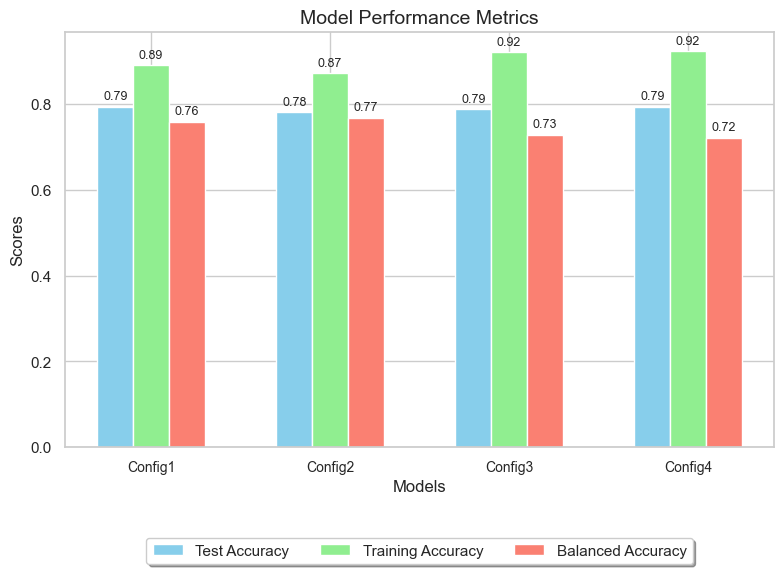

In [1388]:

 
base_estimator_configurations = ['Config1', 'Config2', 'Config3', 'Config4']
 
x = np.arange(len(base_estimator_configurations))  # the label locations
width = 0.2  # the width of the bars
 
fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - width, accuracy_scores, width, label='Test Accuracy', color='skyblue')
rects2 = ax.bar(x, training_accuracy_scores, width, label='Training Accuracy', color='lightgreen')
rects3 = ax.bar(x + width, balanced_accuracy_scores, width, label='Balanced Accuracy', color='salmon')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(base_estimator_configurations, fontsize=10)
 
# Move the legend to the upper right corner
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

 
# Add labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
 
# Call the function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()

### Decision Tree with RFE (Shefali)

In [1389]:
# RFE WITH DECISSION TREE CLASSIFIER
 


accuracy_scores = []
training_accuracy_scores=[]
balanced_accuracy_scores=[]
# for n_features in number_of_feature_range:
    # Define the feature selection and classification models
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=55)
# Create the ensemble classifier
ensemble_clf = DecisionTreeClassifier()
# Create pipeline with RFE and ensemble classifier
pipeline = Pipeline(steps=[('feature_selection', rfe), ('estimator', ensemble_clf)])
# Define hyperparameters grid
param_grid = {
    'estimator__max_depth': [10, 20, 30]
}
# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)
# Get best estimator and parameters
best_clf = grid_search.best_estimator_
best_params = grid_search.best_params_
# Evaluate on test set
y_pred = best_clf.predict(X_test)
y_train_pred=best_clf.predict(X_train)
score = accuracy_score(y_pred, Y_test)
balanced_accuracy = balanced_accuracy_score(y_pred, Y_test)
training_score = accuracy_score(y_train_pred, Y_train)
# Print results
accuracy_scores.append(score)
training_accuracy_scores.append(training_score)
balanced_accuracy_scores.append(balanced_accuracy)
print("Best Parameters:", best_params)
print("Accuracy:", score)
print("Balanced Accuracy Score:", balanced_accuracy)

# Additional evaluation metrics
conf_matrix = confusion_matrix(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
print('Confusion Matrix:', conf_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Classification Report:', classification_report(Y_test, y_pred))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters: {'estimator__max_depth': 20}
Accuracy: 0.7531425364758698
Balanced Accuracy Score: 0.6505071436039292
Confusion Matrix: [[8205  370 1078]
 [ 720  370  227]
 [1819  185 4846]]
Precision: 0.6505071436039292
Recall: 0.6127938698421658
F1 Score: 0.626691213012005
Classification Report:               precision    recall  f1-score   support

           0       0.76      0.85      0.80      9653
           1       0.40      0.28      0.33      1317
           2       0.79      0.71      0.75      6850

    accuracy                           0.75     17820
   macro avg       0.65      0.61      0.63     17820
weighted avg       0.75      0.75      0.75     17820



### Decision Tree (Shefali)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'estimator__max_depth': 20}
DecisionTreeClassifier(max_depth=30, min_samples_leaf=4, min_samples_split=10)
Accuracy: 0.7621212121212121
Balanced Accuracy Score: 0.6635495159641532


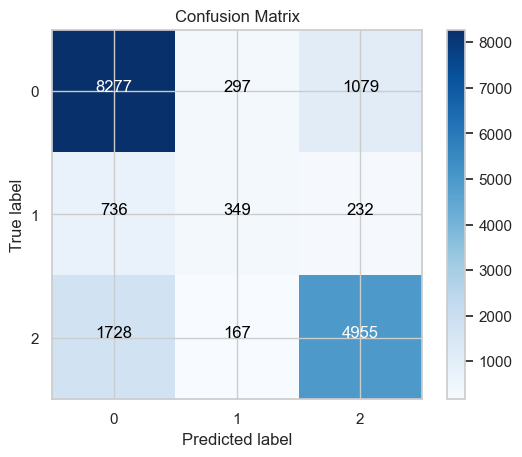

Confusion Matrix: [[8277  297 1079]
 [ 736  349  232]
 [1728  167 4955]]
Precision: 0.6635495159641532
Recall: 0.6152691696937941
F1 Score: 0.6316581926817818
Classification Report:               precision    recall  f1-score   support

           0       0.77      0.86      0.81      9653
           1       0.43      0.26      0.33      1317
           2       0.79      0.72      0.76      6850

    accuracy                           0.76     17820
   macro avg       0.66      0.62      0.63     17820
weighted avg       0.75      0.76      0.75     17820



In [1390]:
#Decision Tree Classifier
 


# Define the parameter grid for the Decision Tree Classifier
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
 
# Instantiate a Decision Tree Classifier
decisiontreemodel = DecisionTreeClassifier()
 
# Perform grid search with cross-validation to find the best estimator
grid_search = GridSearchCV(decisiontreemodel, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)
 
# Get the best estimator from the grid search
best_clf = grid_search.best_estimator_
best_param=grid_search.best_params_
print(best_params)
print(best_clf)
# Make predictions on the test set
y_pred = best_clf.predict(X_test)
 
# Calculate evaluation metrics
score = accuracy_score(y_pred, Y_test)
balanced_accuracy = balanced_accuracy_score(y_pred, Y_test)
training_score = accuracy_score(y_train_pred, Y_train)
# Print results
accuracy_scores.append(score)
training_accuracy_scores.append(training_score)
balanced_accuracy_scores.append(balanced_accuracy) 
# Print accuracy scores
print("Accuracy:", score)
print("Balanced Accuracy Score:", balanced_accuracy)
 
# Plot confusion matrix
plot_confusion_matrix(Y_test, y_pred)
 
# Calculate and print additional evaluation metrics
conf_matrix = confusion_matrix(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')
 
print('Confusion Matrix:', conf_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Classification Report:', classification_report(Y_test, y_pred))
 

#### Decision Tree with RFE

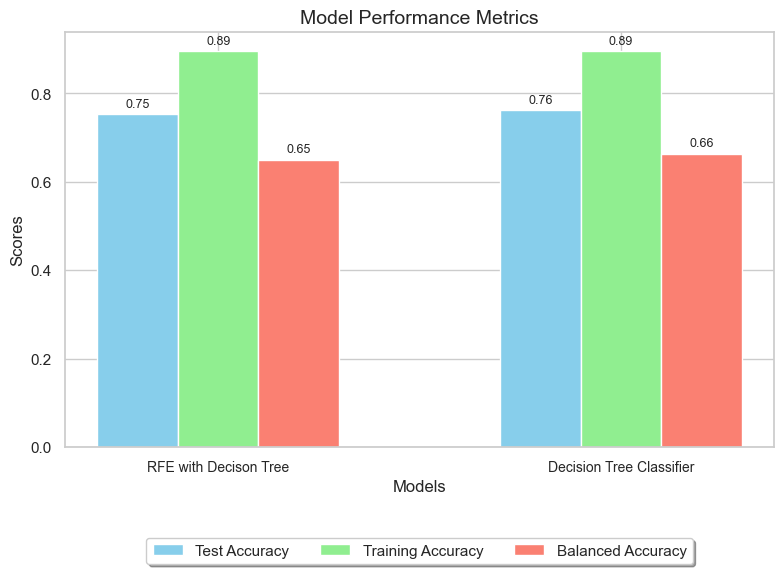

In [1391]:

base_estimator_configurations = ['RFE with Decison Tree', 'Decision Tree Classifier']

x = np.arange(len(base_estimator_configurations))  # the label locations
x
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(8, 6))

accuracy_scores
training_accuracy_scores
balanced_accuracy_scores
rects1 = ax.bar(x - width, accuracy_scores, width, label='Test Accuracy', color='skyblue')
rects2 = ax.bar(x, training_accuracy_scores, width, label='Training Accuracy', color='lightgreen')
rects3 = ax.bar(x + width, balanced_accuracy_scores, width, label='Balanced Accuracy', color='salmon')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(base_estimator_configurations, fontsize=10)
# Move the legend to the upper right corner
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)

# Add labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
# Call the function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.tight_layout()
plt.savefig('performance_metrics_plot.png', bbox_inches='tight')
plt.show()




### Gradient Boost (Shruti)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Pipeline(steps=[('estimator', GradientBoostingClassifier(max_depth=10))])
{'estimator__max_depth': 10}
Accuracy Score on Test Data: 0.7908529741863075
Accuracy Score on Training Data: 0.8891534391534391
Balanced Accuracy Score: 0.7221354318987423


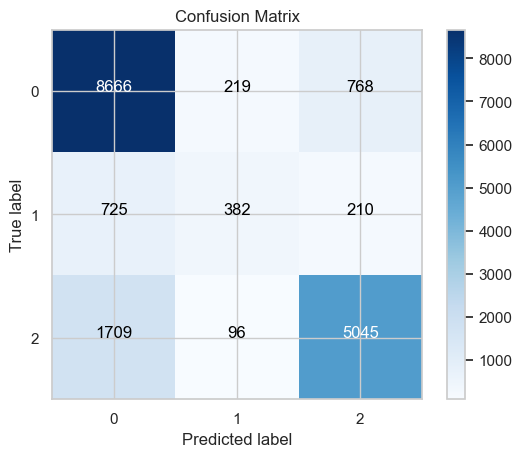

Confusion Matrix: [[8666  219  768]
 [ 725  382  210]
 [1709   96 5045]]
Precision: 0.7221354318987423
Recall: 0.6414338318882151
F1 Score: 0.6661040094230698
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.90      0.84      9653
           1       0.55      0.29      0.38      1317
           2       0.84      0.74      0.78      6850

    accuracy                           0.79     17820
   macro avg       0.72      0.64      0.67     17820
weighted avg       0.79      0.79      0.78     17820



In [1392]:
# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'learning_rate': [0.01, 0.025, 0.05],
    'subsample': [0.5, 0.8, 1.0],
    'n_estimators': [50, 100]
}

# Initialize lists to store accuracy scores
boosting_accuracy_scores = []
boosting_training_accuracy_scores = []
boosting_balanced_accuracy_scores = []

# Create Gradient Boosting classifier object
gb_classifier = GradientBoostingClassifier()

# Perform grid search on Gradient Boosting parameters
param_grid = {'max_depth': [10, 20, 30]}
param_grid_combined = {f'estimator__{param_name}': param_values for param_name, param_values in param_grid.items()}
pipeline = Pipeline(steps=[('estimator', gb_classifier)])
grid_search = GridSearchCV(pipeline, param_grid_combined, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best estimator from grid search
best_gb_clf = grid_search.best_estimator_
print(grid_search.best_estimator_)
best_gb_params = grid_search.best_params_ 
print(best_gb_params)

# Make predictions on test data
y_pred = best_gb_clf.predict(X_test)

# Make predictions on training data
y_train_pred = best_gb_clf.predict(X_train)

# Calculate accuracy scores
test_accuracy_score = accuracy_score(y_pred, Y_test)
training_accuracy_score = accuracy_score(y_train_pred, Y_train)
balanced_accuracy = balanced_accuracy_score(y_pred, Y_test)

# Print accuracy scores
print("Accuracy Score on Test Data:", test_accuracy_score)
print("Accuracy Score on Training Data:", training_accuracy_score)
print("Balanced Accuracy Score:", balanced_accuracy)

# Append scores to respective lists
boosting_accuracy_scores.append(test_accuracy_score)
boosting_training_accuracy_scores.append(training_accuracy_score)
boosting_balanced_accuracy_scores.append(balanced_accuracy)

# Plot confusion matrix
plot_confusion_matrix(Y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:', conf_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Classification Report:', classification_report(Y_test, y_pred))

### XGBoost (Shruti)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
{'booster': 'gbtree', 'learning_rate': 0.5, 'min_child_weight': 3}
Best XGBoost estimator: XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Accuracy Score on Test Data: 0.7902918069584737
Accuracy Score on Training Data: 

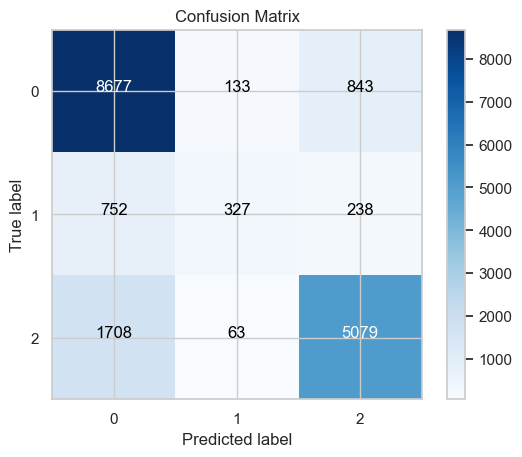

Confusion Matrix: [[8677  133  843]
 [ 752  327  238]
 [1708   63 5079]]
Precision: 0.7429555518615727
Recall: 0.6295476540261801
F1 Score: 0.6569823432117209
Classification Report:               precision    recall  f1-score   support

           0       0.78      0.90      0.83      9653
           1       0.63      0.25      0.36      1317
           2       0.82      0.74      0.78      6850

    accuracy                           0.79     17820
   macro avg       0.74      0.63      0.66     17820
weighted avg       0.79      0.79      0.78     17820



In [1393]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'booster': ['gblinear','gbtree'],
    'min_child_weight': [3, 5, 10],
    'learning_rate': [0.01, 0.025, 0.5]
}

# Create XGBoost classifier object
xgb_classifier = xgboost.XGBClassifier()

# Perform grid search on XGBoost parameters
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the grid search to training data
grid_search_xgb.fit(X_train, Y_train)

# Get the best estimator from grid search
best_xgb_clf = grid_search_xgb.best_estimator_
best_xgb_params = grid_search_xgb.best_params_ 
print(best_xgb_params)
# Print the best estimator found
print("Best XGBoost estimator:", best_xgb_clf)

# Make predictions on test data
y_pred = best_xgb_clf.predict(X_test)

# Make predictions on training data
y_train_pred = best_xgb_clf.predict(X_train)

# Calculate accuracy scores
test_accuracy_score = accuracy_score(y_pred, Y_test)
training_accuracy_score = accuracy_score(y_train_pred, Y_train)
balanced_accuracy = balanced_accuracy_score(y_pred, Y_test)

# Print accuracy scores
print("Accuracy Score on Test Data:", test_accuracy_score)
print("Accuracy Score on Training Data:", training_accuracy_score)
print("Balanced Accuracy Score:", balanced_accuracy)

# Append scores to respective lists
boosting_accuracy_scores.append(test_accuracy_score)
boosting_training_accuracy_scores.append(training_accuracy_score)
boosting_balanced_accuracy_scores.append(balanced_accuracy)

# Plot confusion matrix
plot_confusion_matrix(Y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(Y_test, y_pred, average='macro')
recall = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')

# Print confusion matrix and evaluation metrics
print('Confusion Matrix:', conf_matrix)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Classification Report:', classification_report(Y_test, y_pred))

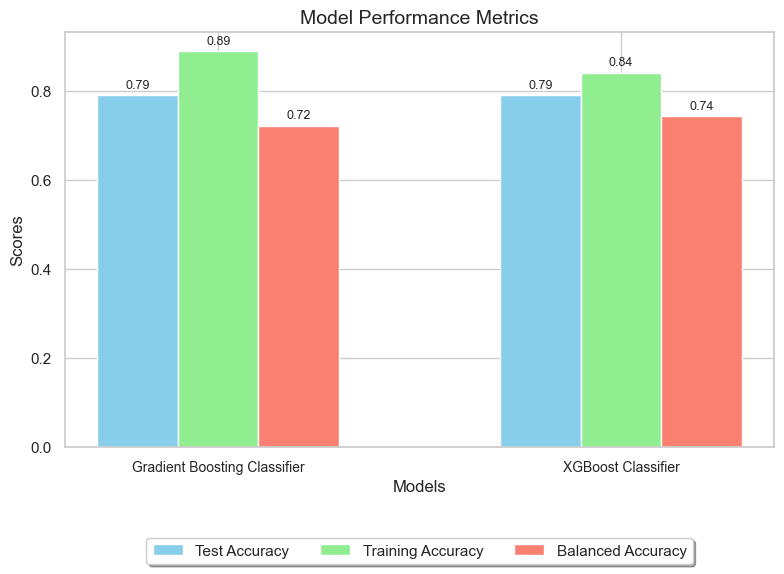

In [1394]:

base_estimator_configurations = ['Gradient Boosting Classifier', 'XGBoost Classifier']

x = np.arange(len(base_estimator_configurations))  # the label locations
width = 0.2  # the width of the bars
fig, ax = plt.subplots(figsize=(8, 6))


rects1 = ax.bar(x - width, boosting_accuracy_scores, width, label='Test Accuracy', color='skyblue')
rects2 = ax.bar(x, boosting_training_accuracy_scores, width, label='Training Accuracy', color='lightgreen')
rects3 = ax.bar(x + width, boosting_balanced_accuracy_scores, width, label='Balanced Accuracy', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(base_estimator_configurations, fontsize=10)
# Move the legend to the upper right corner
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=3)
# Add labels on each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)
# Call the function for each set of bars
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.tight_layout()
plt.show()

In [1396]:
import pandas as pd 
import numpy as np

test_file=pd.read_csv('test_file.csv')

test_file.columns 

test_file['year'] = pd.to_datetime(test_file['date_recorded']).dt.year
test_file['age'] = test_file['year'] - test_file['construction_year'] 
test_file['district_code'] = test_file['district_code'].astype(object)
binning_construction_year_condition = [test_file.construction_year > 2005, 
       test_file.construction_year > 2000, 
       test_file.construction_year > 1990, 
       test_file.construction_year > 1980, 
       test_file.construction_year > 1970]
binning_construction_year_values = ['2005>', '2000-2005', '1990-2000', '1980-1990', '1970-1990']

test_file['built_year'] = np.select(binning_construction_year_condition, binning_construction_year_values, 'others')

test_file['zero_private']=np.where(test_file.num_private==0,1,0)
test_file_id=test_file[['id']]
test_file.drop(
    ['extraction_type_group', 'extraction_type', 'payment', 'source_type','source_class' ,'management_group', 'latitude', 'longitude','num_private','region_code',
     'waterpoint_type', 'quantity_group', 'scheme_management', 'wpt_name', 'scheme_name'], axis=1,
    inplace=True)

test_file.drop(['subvillage', 'ward', 'lga', 'id', 'date_recorded', 'recorded_by', 'year'],
                axis=1, inplace=True)
categorical_col = [columns for columns in test_file.columns if test_file[columns].dtype == 'O']
high_card_columns = [columns for columns in categorical_col if len(test_file[columns].value_counts().index) > 500]
high_card_columns

for high_cardinality_cols in high_card_columns:
    test_file[[high_cardinality_cols]] = test_file[[high_cardinality_cols]].where(
        test_file[[high_cardinality_cols]].apply(lambda x: x.map(x.value_counts())) >= 500, 'other')


# check for missing value
for column in numeric_col:
    test_file[column]=test_file[column].fillna(test_file[column].mode()[0])

for column in categorical_col:
    test_file[column]=test_file[column].fillna(test_file[column].mode()[0])
categorical_col
test_file.columns
permit_encoded = binary_enc.transform(test_file[['permit','public_meeting']])
test_file[['permit', 'public_meeting']] = permit_encoded
row_count = len(test_file)
print(row_count)
test_file_numeric=numeric_imputer.transform(test_file[numeric_col])
test_file_numeric=scaler.transform(test_file_numeric) 
test_file_categorical = categorical_imputer.transform(X[categorical_col])
X_categorical_encoded = onehot_encoder.transform(test_file_categorical)

X_processed_test_file = pd.concat([pd.DataFrame(test_file_numeric, columns=numeric_col),
                         pd.DataFrame(X_categorical_encoded.toarray(),
                                      columns=onehot_encoder.get_feature_names_out(categorical_col))])

X_processed.columns
# label_enc.inverse_transform(test_data['permit'])
y_pred = best_clf.predict(X_test)

14850


In [1397]:
y_pred_dataframe=pd.DataFrame(label_encoder.inverse_transform(y_pred),columns=['status_group'])
y_pred_dataframe

,status_group
0,functional
1,functional needs repair
2,functional
3,functional
4,functional
...,...
17815,functional
17816,functional
17817,non functional
17818,non functional


In [1398]:
submission_file=pd.merge(test_file_id.reset_index(),y_pred_dataframe.reset_index())

In [1399]:
del submission_file['index']

In [1400]:
submission_file.to_csv('submission_file.csv')